# Assignment # 3

### Decision Tree with Scikit-learn & Cross Validation [Split and LeaveOneOut]

#### Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.cross_validation import cross_val_score, LeaveOneOut
from scipy.stats import sem
from sklearn.cross_validation import cross_val_score, LeaveOneOut
from scipy.stats import sem

/home/faisal/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Importing Data and getting basic information of dataset

In [2]:
data = pd.read_csv("loan.csv")

/home/faisal/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(887379, 74)

# Cleansing

#### Dropping unnecessary columns

In [6]:
colsRem = ["id","member_id","desc","emp_title","policy_code","pymnt_plan","title","url"]
data.drop(colsRem,axis=1,inplace=True)
data.shape

(887379, 66)

In [7]:
df = data 

Creating a function to sanitize the 'emp_length' attribute

In [8]:
def getYear(year):
    yearNo = year.split(" ")[0]
    return int(yearNo)

Sanitizing the emp_length column

In [9]:
df["emp_length"].replace("10+ years","10",inplace=True)
df["emp_length"].replace("< 1 year","0",inplace=True)
df["emp_length"].replace("n/a","-1",inplace=True)
df["emp_length"] = df["emp_length"].apply(getYear)
df["emp_length"].unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7, -1])

Sanitizing the term column

In [10]:
def getTerm(term):
    month = term.split(" ")[1]
    return int(month)

In [11]:
df["term"] = df["term"].apply(getTerm)
df["term"].unique()

array([36, 60])

Sanitizing the Zipcode column 

In [12]:
def getZip(zipcode):
    zipcd = zipcode.split("x")[0]
    return int(zipcd)

In [13]:
df["zip_code"] = df["zip_code"].apply(getZip)
df["zip_code"].head()

0    860
1    309
2    606
3    917
4    972
Name: zip_code, dtype: int64

#### Sanitizing the Date inputs

In [14]:
cols = ["earliest_cr_line","issue_d","last_credit_pull_d","last_pymnt_d","next_pymnt_d"]
for col in cols:
    df[col] = pd.to_datetime(df[col],format="%b-%Y")
df[cols].head()

,earliest_cr_line,issue_d,last_credit_pull_d,last_pymnt_d,next_pymnt_d
0,1985-01-01,2011-12-01,2016-01-01,2015-01-01,NaT
1,1999-04-01,2011-12-01,2013-09-01,2013-04-01,NaT
2,2001-11-01,2011-12-01,2016-01-01,2014-06-01,NaT
3,1996-02-01,2011-12-01,2015-01-01,2015-01-01,NaT
4,1996-01-01,2011-12-01,2016-01-01,2016-01-01,2016-02-01


#### Mapping loan_status

In [15]:
df["loan_status"].replace("Late (31-120 days)","Late",inplace=True)
df["loan_status"].replace("Late (16-30 days)","Late",inplace=True)
df["loan_status"].replace("Does not meet the credit policy. Status:Fully Paid","Fully Paid",inplace=True)
df["loan_status"].replace("Does not meet the credit policy. Status:Charged Off","Charged Off",inplace=True)
df["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late',
       'In Grace Period', 'Issued'], dtype=object)

#### Correlation Matrix

In [16]:
df["loan_status_num"] = df["loan_status"]
loanStat = {'Default':0, 'Charged Off':1,'Late':2,'In Grace Period':3,'Issued':4,'Current':5,'Fully Paid':6}
df['loan_status_num'] = df['loan_status_num'].map(loanStat)

In [17]:
corr =df.corr()

#### Plotting correlations using HeatMap

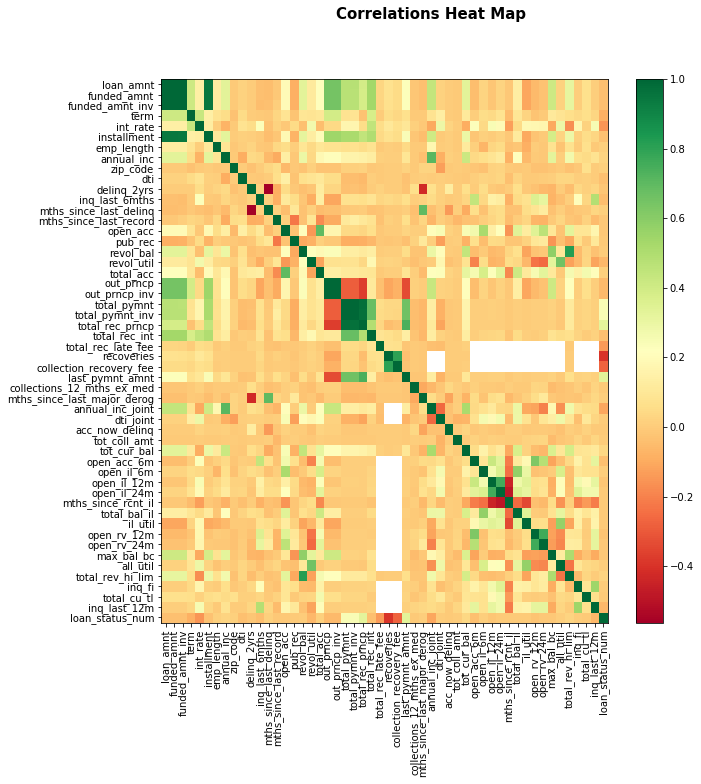

In [18]:
plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlations Heat Map', fontsize=15, fontweight='bold')
plt.show()

#### Extrction of correlation of Loan_status_num with other features

In [19]:
corrvalues = corr.tail(1)
import numpy as np
corrvalues = np.round(corrvalues, decimals=2)

#### Extracting features with correlation greater than 0.1 and less than 0.1

In [21]:
c =[]
for cols in corrvalues:
    if corrvalues[cols][0] <= -0.1 or corrvalues[cols][0] >= 0.1:
        c.append(cols)
print (c)

dfCl = df[c]

['int_rate', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'annual_inc_joint', 'loan_status_num']


In [22]:
dfCl.drop("annual_inc_joint",axis=1,inplace=True)
dfCl.shape

/home/faisal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(887379, 9)

### Normalizing the Inputs

In [23]:
df_norm = (dfCl - dfCl.mean()) / (dfCl.max() - dfCl.min())

In [33]:
dfCl['loan_status_num'].unique()

array([6, 1, 5, 0, 2, 3, 4])

In [ ]:
dfCl['loan_status_num'].unique()

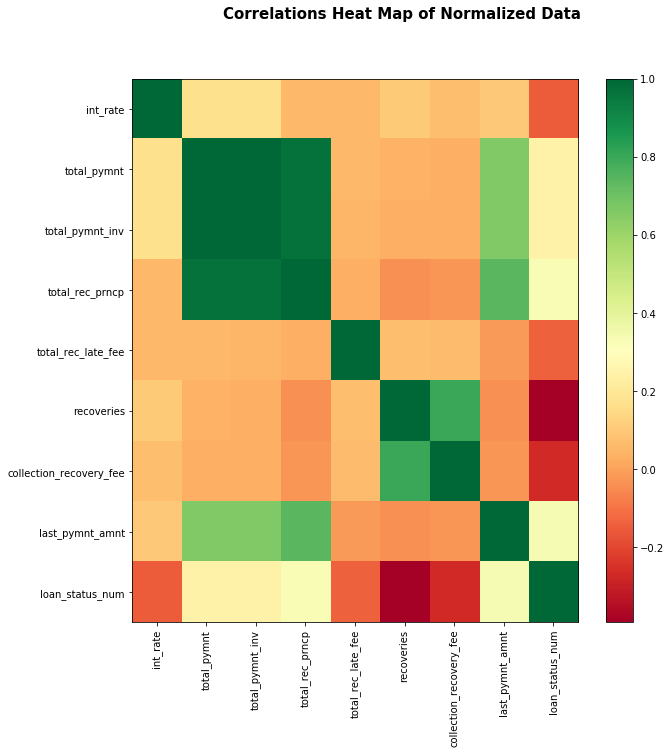

In [24]:
corr = df_norm.corr()
plt.figure(figsize=(10, 10))
plt.imshow(df_norm.corr(), cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlations Heat Map of Normalized Data', fontsize=15, fontweight='bold')
plt.show()

#### Checking for null values in the normalized dataframe

In [25]:
df_norm.isnull().sum()

int_rate                   0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
loan_status_num            0
dtype: int64

# Modelling Decision tree from Scikit Learn

#### Test train Split

In [26]:
loan = dfCl
loanX = loan.drop("loan_status_num",axis=1)
loanX = np.array(loanX)
loanY = loan["loan_status_num"]
loanY = np.array(loanY)
X_train, X_test, y_train, y_test = train_test_split(loanX, loanY, test_size=0.25, random_state=33)

#### Fitting the model

In [27]:
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_leaf=5)
classifier = classifier.fit(X_train,y_train)

#### Generating Report on the fitted model

In [31]:
def performance_measure(X,y,classifier, show_accuracy=True, show_precision = True, show_classification_report=True, show_confusion_matrix=True):
    y_pred=classifier.predict(X)   
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_pred)),"\n")
        
    if show_precision:
        print("Precision Report")
        print("Precision,Recall,F-score")
        print(precision_recall_fscore_support(y, y_pred, average='weighted'))
        
    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y,y_pred),"\n")
        
performance_measure(X_train,y_train,classifier, show_classification_report=True, show_confusion_matrix=True)

Accuracy:0.884 

Precision Report
Precision,Recall,F-score
(0.87619302585478687, 0.88363930317609618, 0.86944002760606354, None)
Confusion matrix


/home/faisal/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[     0      4      0      0      5    883      3]
 [     0  18494      0      0    151  15705    201]
 [     0     71      0      0    123  10189     85]
 [     0     20      0      0    149   4486     50]
 [     0      0      0      0   6261     29     10]
 [     0     59      0      0   6175 443915   1022]
 [     0     90      0      0     10  37922 119422]] 



#### Leave One out implementation (CrossValidation)

#### This may take time according to the specs of used machine. 

In [ ]:
def LeaveOneOut(X_train,y_train,classifier):
    # Perform Leave-One-Out cross validation
    # We are preforming 1313 classifications!
    loo = LeaveOneOut(X_train[:].shape[0])
    scores=np.zeros(X_train[:].shape[0])
    for train_index,test_index in loo:
        X_train_cv, X_test_cv= X_train[train_index], X_train[test_index]
        y_train_cv, y_test_cv= y_train[train_index], y_train[test_index]
        classifier = classifier.fit(X_train_cv,y_train_cv)
        y_pred=classifier.predict(X_test_cv)
        scores[test_index]=metrics.accuracy_score(y_test_cv.astype(int), y_pred.astype(int))
    print (("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores)))

In [ ]:
LeaveOneOut(X_train, y_train,classifier)